In [1]:
# !pip install descartes

In [2]:
# conda install geopandas

In [3]:
# conda install bokeh

In [4]:
# !pip install shapely

In [5]:
import geopandas as gpd

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point, Polygon

In [7]:
df = pd.read_csv('nyc_birds.csv')

In [8]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699064 entries, 0 to 1699063
Data columns (total 15 columns):
GLOBAL UNIQUE IDENTIFIER    object
CATEGORY                    object
COMMON NAME                 object
OBSERVATION_COUNT           int64
LATITUDE                    float64
LONGITUDE                   float64
OBSERVATION_DATE            object
MONTH                       int64
YEAR                        int64
OBSERVER ID                 object
DURATION MINUTES            float64
NUMBER OBSERVERS            float64
TRIP COMMENTS               object
SPECIES COMMENTS            object
APPROVED                    int64
dtypes: float64(4), int64(4), object(7)
memory usage: 194.4+ MB


In [10]:
df.describe()

,OBSERVATION_COUNT,LATITUDE,LONGITUDE,MONTH,YEAR,DURATION MINUTES,NUMBER OBSERVERS,APPROVED
count,1.699064e+06,1.699064e+06,1.699064e+06,1.699064e+06,1.699064e+06,1.581611e+06,1.657644e+06,1699064.0
mean,8.351684e+00,4.077678e+01,-7.396872e+01,6.093081e+00,2.015254e+03,1.297241e+02,3.032239e+00,1.0
std,4.253850e+01,3.126201e-02,1.849401e-02,3.079713e+00,4.753737e+00,1.118350e+02,6.430151e+00,0.0
min,1.000000e+00,4.068435e+01,-7.404715e+01,1.000000e+00,1.880000e+03,0.000000e+00,1.000000e+00,1.0
25%,1.000000e+00,4.077155e+01,-7.397248e+01,4.000000e+00,2.014000e+03,4.500000e+01,1.000000e+00,1.0
50%,2.000000e+00,4.077155e+01,-7.397241e+01,5.000000e+00,2.016000e+03,1.050000e+02,1.000000e+00,1.0
75%,5.000000e+00,4.077954e+01,-7.396541e+01,9.000000e+00,2.018000e+03,1.800000e+02,2.000000e+00,1.0
max,1.255000e+04,4.087877e+01,-7.390822e+01,1.200000e+01,2.020000e+03,7.014000e+03,1.432000e+03,1.0


# Plotting Sighting locations using GeoPandas

**IMPORT SHAPE FILE OF NYC**

In [11]:
nyc_shp = gpd.read_file('geo_export_284cb560-4514-4841-8f9b-354c9b22e355.shp')
nyc_shp.head()

,bbl,bin,built_code,cnstrct_yr,doitt_id,feat_code,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,name,num_floors,shape_area,shape_len,sub_code,geometry
0,4155980564,4462384.0,None,2001.0,939203.0,2100.0,6.0,26.528549,2005-05-31,00:00:00.000,Constructed,None,2.0,1768.567205,169.940373,210000.0,"POLYGON ((-73.74251 40.59909, -73.74259 40.599..."
1,4163500400,4467306.0,E,1938.0,107990.0,2100.0,8.0,17.947245,2009-02-14,00:00:00.000,Constructed,None,1.0,1105.077843,148.987698,210000.0,"POLYGON ((-73.92091 40.55837, -73.92092 40.558..."
2,4160290023,4529256.0,E,1920.0,931167.0,5110.0,6.0,14.242061,2009-02-14,00:00:00.000,Constructed,None,2.0,402.928037,80.661670,511000.0,"POLYGON ((-73.79829 40.59817, -73.79837 40.598..."
3,4163250001,4540232.0,None,0.0,86053.0,2100.0,16.0,14.529231,2013-09-19,00:00:00.000,Constructed,None,2.0,668.812178,108.680772,210000.0,"POLYGON ((-73.87743 40.56522, -73.87749 40.565..."
4,4160900043,4530675.0,None,2004.0,998592.0,2100.0,7.0,42.447070,2010-07-26,00:00:00.000,Constructed,None,3.0,1094.409581,146.076029,210000.0,"POLYGON ((-73.80335 40.58943, -73.80343 40.589..."


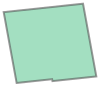

In [12]:
#test out map shape

nyc_shp.iloc[0]['geometry']

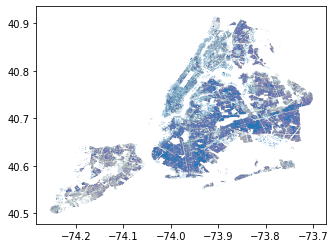

In [13]:
%matplotlib inline

fig,ax = plt.subplots()

nyc_shp.plot(ax=ax)

**Convert Dataframe to coordinate reference system (CRS) FORMAT** 

In [14]:
#instantiate the crs. Here, the epsg code refers to Lat/Long
#https://geopandas.org/projections.html

crs = {'init', 'epsg:4326'}
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1


In [15]:
"""CREATE POINTS"""

geometry = [Point(xy) for xy in zip( df['LATITUDE'], df['LONGITUDE'])]

In [16]:
#review a single entry
geometry[:3]

In [17]:
geo_df = gpd.GeoDataFrame(df,
                         crs=crs, 
                         geometry=geometry)

In [22]:
geo_df.sample(30)

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED,geometry
1300200,URN:CornellLabOfOrnithology:EBIRD:OBS667997296,species,Mourning Dove,1,40.771548,-73.972482,2018-10-18,10,2018,obsr1100873,90.0,1.0,NaN,NaN,1,POINT (40.77155 -73.97248)
1107716,URN:CornellLabOfOrnithology:EBIRD:OBS577330664,species,White-throated Sparrow,1,40.786003,-73.961960,2018-02-13,2,2018,obsr550755,18.0,1.0,NaN,NaN,1,POINT (40.78600 -73.96196)
360588,URN:CornellLabOfOrnithology:EBIRD:OBS203216217,species,American Robin,10,40.754457,-73.964486,2013-06-06,6,2013,obsr24607,10.0,3.0,NaN,NaN,1,POINT (40.75446 -73.96449)
299463,URN:CornellLabOfOrnithology:EBIRD:OBS180607280,species,Common Grackle,1,40.777116,-73.969574,2013-02-03,2,2013,obsr251167,90.0,1.0,NaN,NaN,1,POINT (40.77712 -73.96957)
1494073,URN:CornellLabOfOrnithology:EBIRD:OBS764203023,species,Mallard,2,40.777116,-73.969574,2019-05-22,5,2019,obsr266046,147.0,15.0,AMNH bird walk,NaN,1,POINT (40.77712 -73.96957)
1174505,URN:CornellLabOfOrnithology:EBIRD:OBS618768248,species,Blue Jay,2,40.777116,-73.969574,2018-05-16,5,2018,obsr266046,96.0,12.0,NaN,NaN,1,POINT (40.77712 -73.96957)
460465,URN:CornellLabOfOrnithology:EBIRD:OBS250325909,species,Blue Jay,3,40.771548,-73.972482,2014-05-03,5,2014,obsr457539,240.0,1.0,NaN,NaN,1,POINT (40.77155 -73.97248)
237099,URN:CornellLabOfOrnithology:EBIRD:OBS169503374,species,Herring Gull,1,40.771548,-73.972482,2012-05-07,5,2012,obsr319587,60.0,5.0,NaN,NaN,1,POINT (40.77155 -73.97248)
216398,URN:CornellLabOfOrnithology:EBIRD:OBS143660498,species,Ring-necked Duck,1,40.786003,-73.961960,2012-03-07,3,2012,obsr238563,15.0,1.0,NaN,"Near East Side pump house. White frontal ""spur...",1,POINT (40.78600 -73.96196)
921387,URN:CornellLabOfOrnithology:EBIRD:OBS484505519,species,Blue-gray Gnatcatcher,1,40.777116,-73.969574,2017-04-10,4,2017,obsr338513,66.0,1.0,"Maintenance, Tupelo Meadow, Evodia, swampy pin...",Badly seen near Bow Bridge,1,POINT (40.77712 -73.96957)


KeyboardInterrupt: 

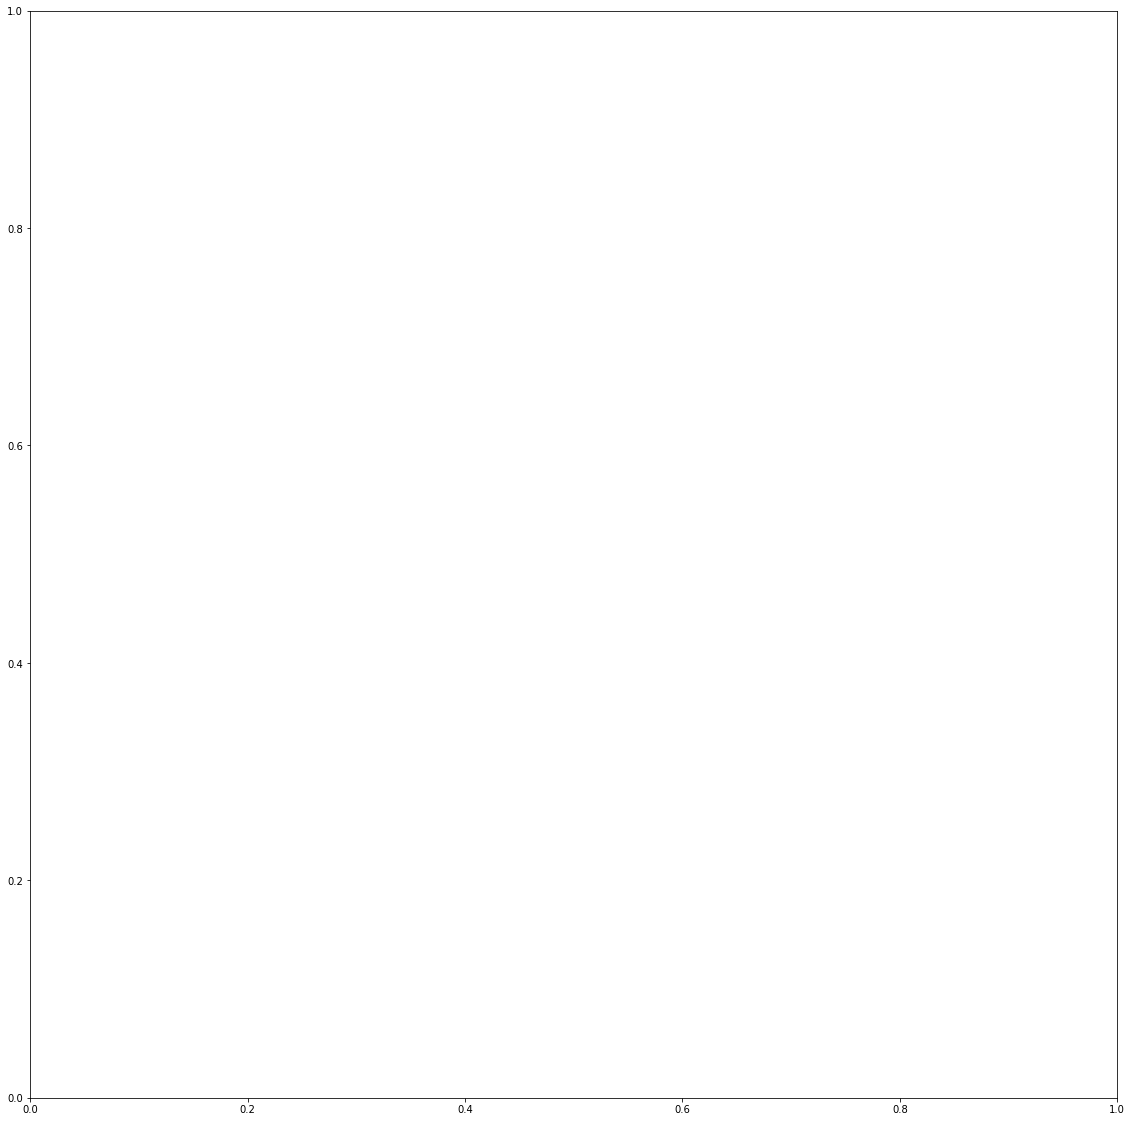

In [23]:
fig, ax = plt.subplots(figsize = (20,20))

nyc_shp.plot(ax=ax, alpha = 0.4, color = 'grey')

geo_df[geo_df['COMMON NAME'] =='Northern Cardinal'].plot(ax=ax, markersize=5, color = 'red', label = 'Cardinal')
geo_df[geo_df['COMMON NAME'] == 'Blue Jay'].plot(ax=ax, markersize=5, color = 'blue', label ='Bluejay')
plt.legend(prop={'size':15})
# plt.show()